In [1]:
import pandas as pd
import sqlite3
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
con = sqlite3.connect('data.sqlite')

In [3]:
brejas = pd.read_sql_query('select * from data', con)

In [4]:
brejas.head()

,aparência_max,rating,sensação,sabor,nome,url,alcool,estilo,aroma,aroma_max,conjunto,rating_count,cervejaria,conjunto_max,sensação_max,pais,aparência,sabor_max,overall_rating
0,5,3.1,3,12,Heineken,http://www.brejas.com.br/cerveja/holanda/heineken,0.050,Premium American Lager,6,10,6,623,Cervejaria Heineken,10,5,Holanda,3,20,3.1
1,5,3.9,4,15,Colorado Indica,http://www.brejas.com.br/cerveja/brasil/colora...,0.070,India Pale Ale (IPA),7,10,8,464,Cervejaria Colorado,10,5,Brasil,4,20,3.9
2,5,3.8,4,15,Leffe Blonde,http://www.brejas.com.br/cerveja/belgica/leffe...,0.066,Belgian Blond Ale,7,10,8,455,Abbaye de Leffe,10,5,Bélgica,4,20,3.8
3,5,3.7,4,15,Hoegaarden,http://www.brejas.com.br/cerveja/belgica/hoega...,0.049,Witbier,7,10,8,455,Brouwerij Hoegaarden,10,5,Bélgica,4,20,3.7
4,5,2.9,3,11,Stella Artois,http://www.brejas.com.br/cerveja/belgica/stell...,0.052,Premium American Lager,5,10,6,426,Stella Artois,10,5,Bélgica,3,20,2.9


In [5]:
brejas.dtypes

aparência_max       int64
rating            float64
sensação            int64
sabor               int64
nome               object
url                object
alcool            float64
estilo             object
aroma               int64
aroma_max           int64
conjunto            int64
rating_count        int64
cervejaria         object
conjunto_max        int64
sensação_max        int64
pais               object
aparência           int64
sabor_max           int64
overall_rating    float64
dtype: object

In [6]:
brejas.groupby('estilo').estilo.count()

estilo
Altbier                                     3
Amber Lager                                28
American Amber Ale                         30
American Brown Ale                         15
American IPA                                9
American Pale Ale                          78
American Stout                             11
American Wheat/Rye                         10
American Wild Ale                           1
Barley Wine                                21
Belgian Blond Ale                          38
Belgian Dark Strong Ale                    52
Belgian Dubbel                             36
Belgian Golden Strong Ale                  52
Belgian IPA                                 3
Belgian Pale Ale                           20
Belgian Quadrupel / ABT                     8
Belgian Specialty Ale                      25
Belgian Tripel                             47
Berliner Weisse                             3
Biere de Garde                              8
Bière de Champagne / Bière 

In [7]:
beer_pairs = [(b1, b2) for b1 in brejas.nome for b2 in brejas.nome if b1 != b2]

In [80]:
brejas.iloc[0]

aparência_max                                                     5
rating                                                          3.1
sensação                                                          3
sabor                                                            12
nome                                                       Heineken
url               http://www.brejas.com.br/cerveja/holanda/heineken
alcool                                                         0.05
estilo                                       Premium American Lager
aroma                                                             6
aroma_max                                                        10
conjunto                                                          6
rating_count                                                    623
cervejaria                                      Cervejaria Heineken
conjunto_max                                                     10
sensação_max                                    

In [8]:
def beer_reviews_vector(beer, normalize=False):
    #     cols = ['aroma', 'sensação', 'aparência', 'sabor', 'conjunto', 'overall_rating']
    #     vec = beer[cols]
    if beer.shape[0] > 1:
        beer = beer.iloc[0]
    vec = [beer['aroma'], beer['sensação'], beer['aparência'], beer['sabor'], beer['conjunto'], beer['overall_rating']]
    vec = np.array([float(v) for v in vec])
    if normalize:
        vecm = [beer['aroma_max'], beer['sensação_max'], beer['aparência_max'], beer['sabor_max'], beer['conjunto_max'], 5.0]
        vecm = np.array([float(v) for v in vecm])
        vec = vec / vecm

    return vec

def calculate_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def beer_calculate_distance(beer1, beer2, norm=False):
    beer1 = brejas[brejas.nome == beer1]
    beer2 = brejas[brejas.nome == beer2]
    return calculate_distance(beer_reviews_vector(beer1, norm), beer_reviews_vector(beer2, norm))

vectors = {nome: beer_reviews_vector(brejas[brejas.nome == nome]) for nome in brejas.nome}
vectors_n = {nome: beer_reviews_vector(brejas[brejas.nome == nome], True) for nome in brejas.nome}

In [9]:
dist = [calculate_distance(vectors[bp[0]], vectors[bp[1]]) for bp in beer_pairs]

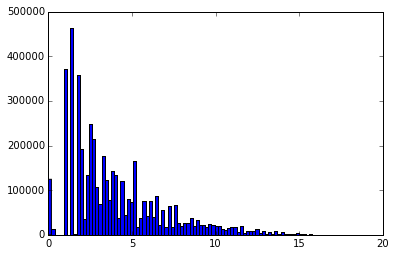

In [10]:
pyplot.hist(dist, bins=100);

In [11]:
dist_n = [calculate_distance(vectors_n[bp[0]], vectors_n[bp[1]]) for bp in beer_pairs]

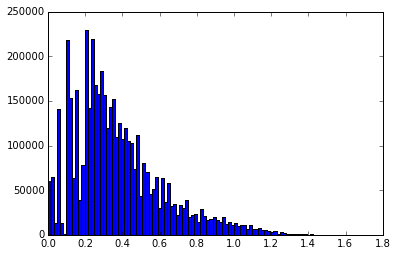

In [93]:
pyplot.hist(dist_n, bins=100);

In [12]:
n1 = [p[0] for p in beer_pairs]
n2 = [p[1] for p in beer_pairs]
simi = pd.DataFrame({'n1': n1, 'nome': n2, 'dist': dist, 'dist_n': dist_n})

In [16]:
x = simi[simi.n1 == 'Heineken']
x[x.dist_n == 0]

y = pd.merge(x, brejas, on='nome').sort('rating_count', ascending=False)
y[y.estilo == "Premium American Lager"].sort(['dist_n', 'rating_count']).head()

,dist,dist_n,n1,nome,aparência_max,rating,sensação,sabor,url,alcool,...,aroma_max,conjunto,rating_count,cervejaria,conjunto_max,sensação_max,pais,aparência,sabor_max,overall_rating
887,0.0,0.00,Heineken,Colorado Cauim Allez Les Bleus,5,3.1,3,12,http://www.brejas.com.br/cerveja/brasil/colora...,0.045,...,10,6,23,Cervejaria Colorado,10,5,Brasil,3,20,3.1
403,0.0,0.00,Heineken,Ravache,5,3.1,3,12,http://www.brejas.com.br/cerveja/brasil/ravache,0.048,...,10,6,57,Cervejaria Guitt´s,10,5,Brasil,3,20,3.1
332,0.0,0.00,Heineken,Way Premium Lager,5,3.1,3,12,http://www.brejas.com.br/cerveja/brasil/way-pr...,0.053,...,10,6,66,Cervejaria Way,10,5,Brasil,3,20,3.1
1270,0.1,0.02,Heineken,GaudenBier Lager Naturtrübe,5,3.0,3,12,http://www.brejas.com.br/cerveja/brasil/gauden...,0.047,...,10,6,14,Gaudenbier Cervejaria,10,5,Brasil,3,20,3.0
904,0.1,0.02,Heineken,Bierbaum Gold,5,3.0,3,12,http://www.brejas.com.br/cerveja/brasil/bierba...,0.057,...,10,6,23,Cervejaria Bierbaum,10,5,Brasil,3,20,3.0
